In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('../1_dock/')
sys.path.append('../2_ifp/')
sys.path.append('../3_analyze/')
from density_estimate import DensityEstimate

%matplotlib inline

In [2]:
'1.0,1.7280957689345207'.split(',')

['1.0', '1.7280957689345207']

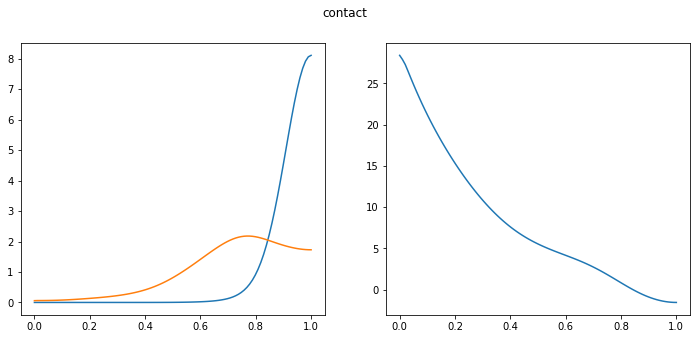

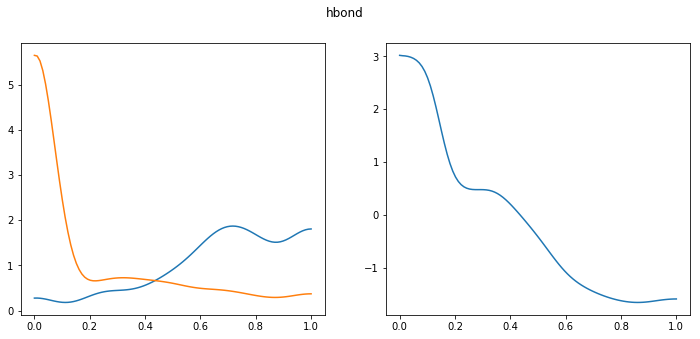

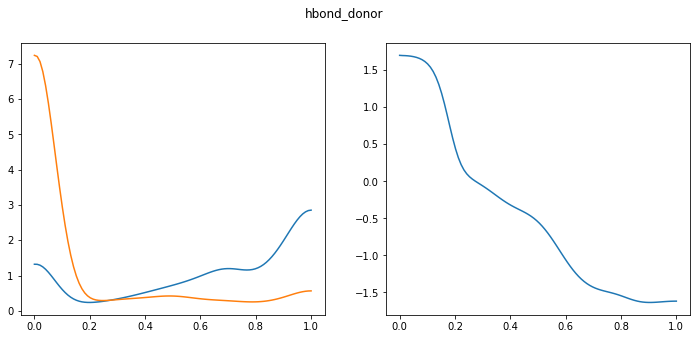

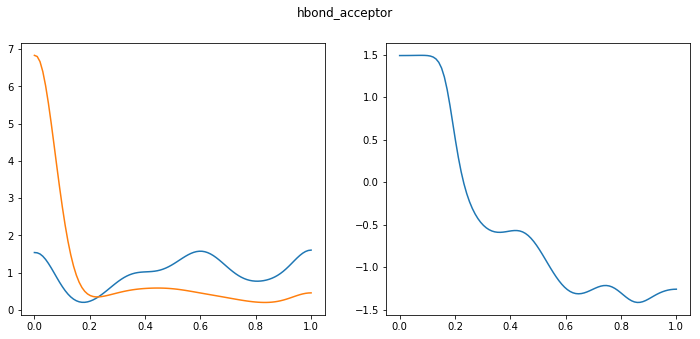

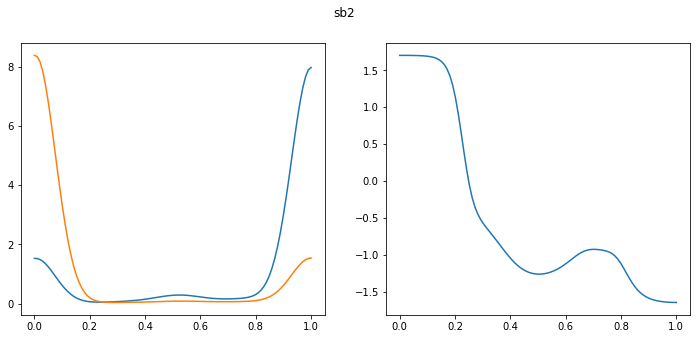

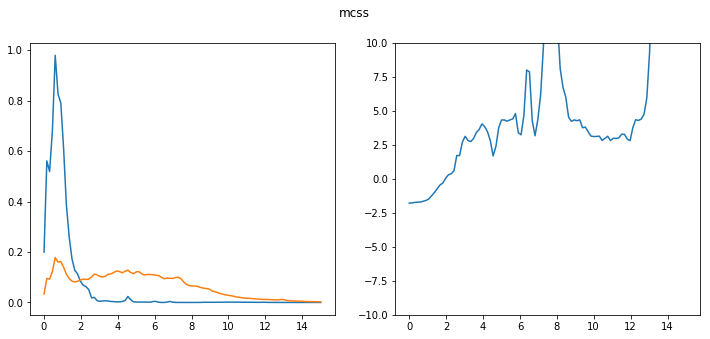

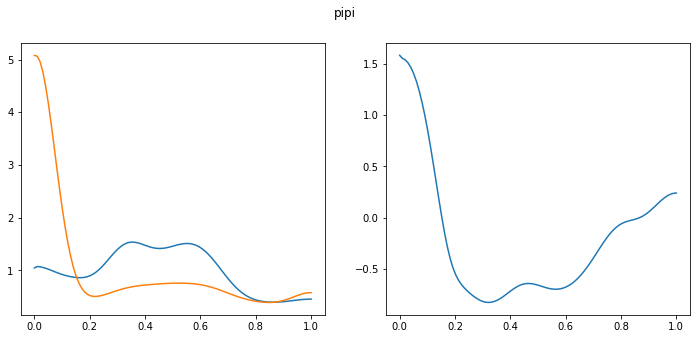

In [9]:
for interaction in ['contact', 'hbond', 'hbond_donor', 'hbond_acceptor', 'sb2','mcss','pipi']:
    f, ax = plt.subplots(1, 2, figsize = (12, 5))
    native = DensityEstimate.read('../../combind_data/bpp_data/B2AR/scores/test/native_{}.txt'.format(interaction))
    reference = DensityEstimate.read('../../combind_data/bpp_data/B2AR/scores/test/reference_{}.txt'.format(interaction))
    ax[0].plot(native.x, native.fx)
    ax[0].plot(reference.x, reference.fx)
    ratio = native.ratio(reference)
    ax[1].plot(ratio.x, -np.log(ratio.fx))
    if interaction == 'mcss':
        ax[1].set_ylim(-10, 10)
    plt.suptitle(interaction)
    plt.show()

In [ ]:
proteins = ['O60885', 'GCR', 'BRAF', 'DTRANSP', 'P00749', 'SMO', 'P03951', 'AR', 'MEK1',
            '5HT2B', 'P00760', 'CDK2', 'SIGMA1', 'JAK2', 'ERA', 'P18031', 'P00489', 'A2AR',
            'PLK1', 'VITD', 'GLUT1', 'MGLUR5', 'STRANSP', 'B2AR', 'TRPV1', 'Q9Y233', 'P00734',
            'MR', 'M3', 'Q16539', 'P00742', 'P56817', 'P07900', 'P24941', 'B1AR', 'CHK1']
f, ax = plt.subplots(1, 3, figsize = (18, 5))
for prot in proteins:
    try:
        native = DensityEstimate.read('../../combind_data/bpp_data/{}/stats/stats5/native.de'.format(prot))
        reference = DensityEstimate.read('../../combind_data/bpp_data/{}/stats/stats5/reference.de'.format(prot))
        ratio = DensityEstimate.read('../../combind_data/bpp_data/{}/stats/stats5/pnative.de'.format(prot))
        last = float('inf')
        for x, y in zip(ratio.x, ratio.fx):
            if y > last:
                print prot, x, last-y
                break
            last = y
        
        ax[0].plot(ratio.x, ratio.fx, label = prot)
        ax[1].plot(native.x, native.fx, label = prot)
        ax[2].plot(reference.x, reference.fx, label = prot)
    except:
        print prot
plt.legend()
plt.show()
plt.plot(native.x, native.fx*native.n_samples)
plt.plot(reference.x, reference.fx*reference.n_samples)
plt.show()
plt.plot(ratio.x, ratio.fx)
plt.show()

plt.plot(ratio.x, np.log(ratio.fx))
plt.show()
plt.plot(ratio.x, np.log(ratio.fx))
plt.ylim(-10, 0)
plt.show()


plt.plot(ratio.x, ratio.fx)
plt.plot(reference.x, reference.fx * 1 / reference.fx.max())
plt.plot(native.x, native.fx * 1 / native.fx.max())

In [220]:
print np.log(native.n_samples / reference.n_samples)

-1.53511219395


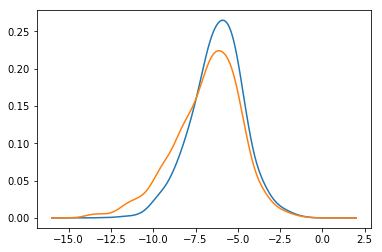

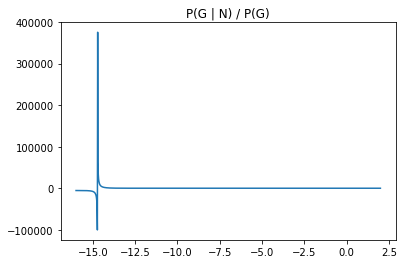

/Users/jpaggi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log
/Users/jpaggi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in log


C = -7.44144144144


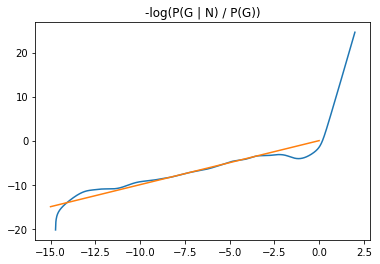

/Users/jpaggi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in log


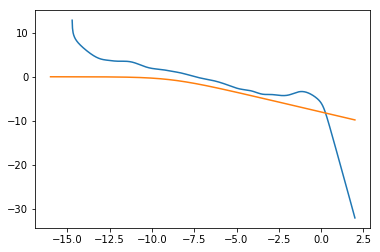

In [224]:
# Compute decoy distribution
decoy    = DensityEstimate()
decoy.x  = native.x
decoy.fx = (reference.fx*reference.n_samples - native.fx*native.n_samples) / (reference.n_samples - native.n_samples)

plt.plot(decoy.x, decoy.fx)
plt.plot(reference.x, reference.fx)
plt.show()

plt.title('P(G | N) / P(G)')
ratio2 = native.ratio(decoy, prob = True)
plt.plot(ratio2.x, ratio2.fx)
plt.show()
for x, y in zip(ratio2.x, -np.log(ratio2.fx)):
    if y > 0:
        c = x
        print 'C =', x
        break

plt.title('-log(P(G | N) / P(G))')
plt.plot(ratio2.x, - np.log(ratio2.fx) + c)
plt.plot([-15, 0], [-15, 0])
plt.show()

plt.plot(ratio2.x, np.log(ratio2.fx))
plt.plot(ratio.x, -ratio2.x/T - np.log(np.exp(-ratio2.x/T) + np.exp(C)))

plt.show()

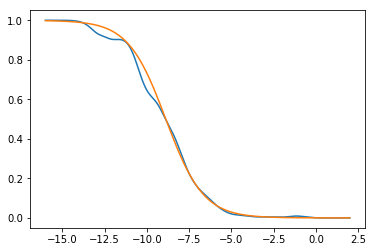

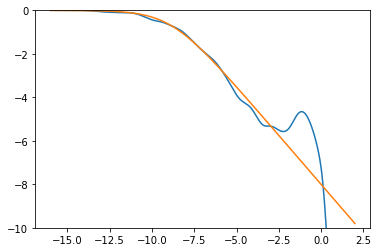

In [175]:
T = 1.11
C = 8

ratio = DensityEstimate.read('../../combind_data/bpp_data/AR/stats/stats5/pnative.de')
plt.plot(ratio.x, ratio.fx)
plt.plot(ratio.x, np.exp(-ratio.x/T) / (np.exp(-ratio.x/T) + np.exp(C)))
plt.show()

plt.plot(ratio.x, np.log(ratio.fx))
plt.plot(ratio.x, -ratio.x/T - np.log(np.exp(-ratio.x/T) + np.exp(C)))
plt.ylim(-10, 0)
plt.show()

-8.88288288288


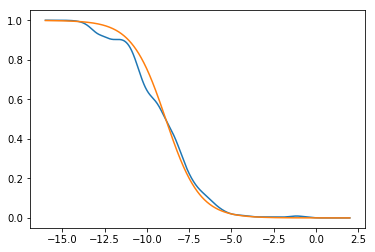

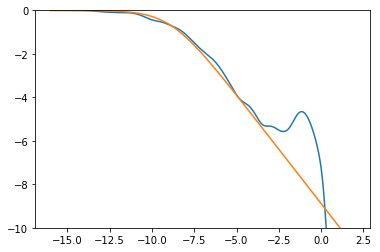

In [174]:
T = 1.0
C = 8.88288

ratio = DensityEstimate.read('../../combind_data/bpp_data/AR/stats/stats5/pnative.de')

for x, y in zip(ratio.x, ratio.fx):
    if y < 0.5:
        print x
        break
        
plt.plot(ratio.x, ratio.fx)
plt.plot(ratio.x, np.exp(-ratio.x/T) / (np.exp(-ratio.x/T) + np.exp(C)))
plt.show()

plt.plot(ratio.x, np.log(ratio.fx))
plt.plot(ratio.x, -ratio.x/T - np.log(np.exp(-ratio.x/T) + np.exp(C)))
plt.ylim(-10, 0)
plt.show()

-8.88288288288


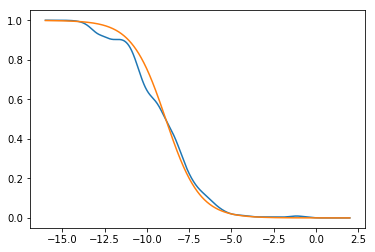

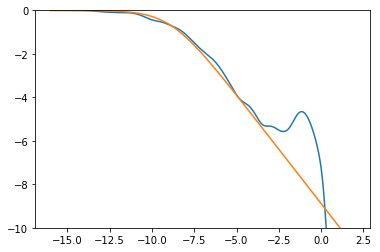

In [177]:
T = 1.0
C = 8.88288

ratio = DensityEstimate.read('../../combind_data/bpp_data/AR/stats/stats5/pnative.de')

for x, y in zip(ratio.x, ratio.fx):
    if y < 0.5:
        print x
        break
        
plt.plot(ratio.x, ratio.fx)
plt.plot(ratio.x, 1 / (1 + np.exp(ratio.x + C)))
plt.show()

plt.plot(ratio.x, np.log(ratio.fx))
plt.plot(ratio.x, - np.log(1 + np.exp(ratio.x + C)))
plt.ylim(-10, 0)
plt.show()

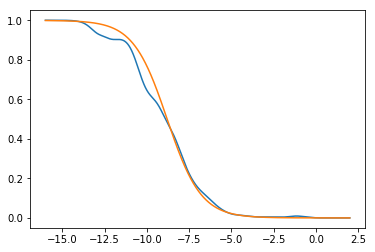

In [229]:
T = 1.0
C = 8.8

#ratio = DensityEstimate.read('../../combind_data/bpp_data/AR/stats/stats5/pnative.de')
plt.plot(ratio.x, ratio.fx)
plt.plot(ratio.x, 1 / (1 + np.exp(ratio.x + C)))
plt.show()

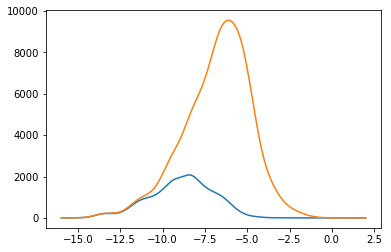

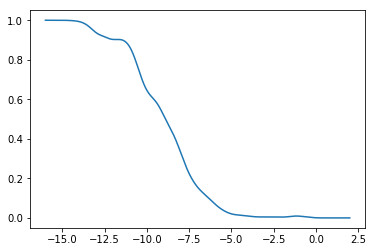

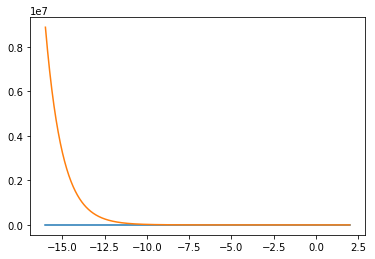

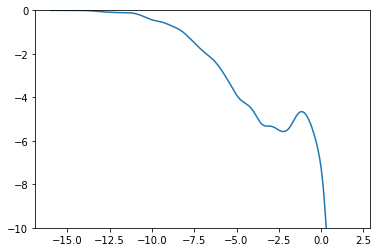

In [71]:
native = DensityEstimate.read('../../combind_data/bpp_data/AR/stats/stats5/native.de')
reference = DensityEstimate.read('../../combind_data/bpp_data/AR/stats/stats5/reference.de')


plt.plot(native.x, native.fx*native.n_samples)
plt.plot(reference.x, reference.fx*reference.n_samples)
plt.show()
plt.plot(ratio.x, ratio.fx)
plt.show()


plt.plot(ratio.x, np.log(ratio.fx))
plt.ylim(-10, 0)
plt.show()

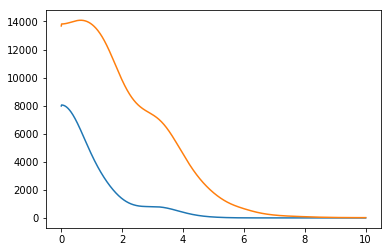

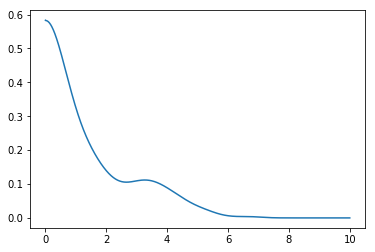

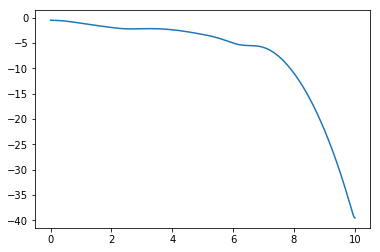

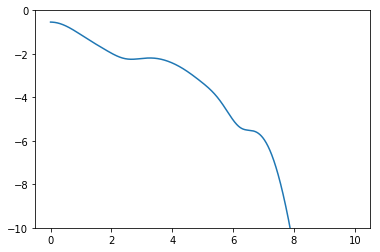

In [30]:
native = DensityEstimate.read('../../combind_data/bpp_outputs/glide_scaled.native.de')
reference = DensityEstimate.read('../../combind_data/bpp_outputs/glide_scaled.reference.de')
ratio = DensityEstimate.read('../../combind_data/bpp_outputs/glide_scaled.pnative.de')

plt.plot(native.x, native.fx*native.n_samples)
plt.plot(reference.x, reference.fx*reference.n_samples)
plt.show()
plt.plot(ratio.x, ratio.fx)
plt.show()

plt.plot(ratio.x, np.log(ratio.fx))
plt.show()
plt.plot(ratio.x, np.log(ratio.fx))
plt.ylim(-10, 0)
plt.show()

In [26]:
native.x[:5], native.fx[:5]

(array([ 0.       ,  0.1010101,  0.2020202,  0.3030303,  0.4040404]),
 array([ 0.6548149 ,  0.71043041,  0.69821418,  0.67482334,  0.64215236]))

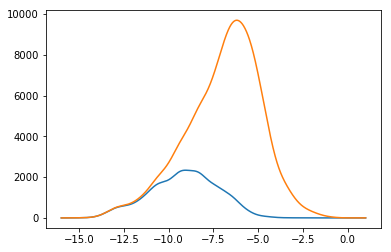

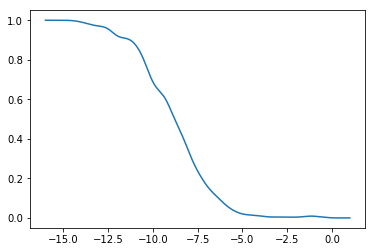

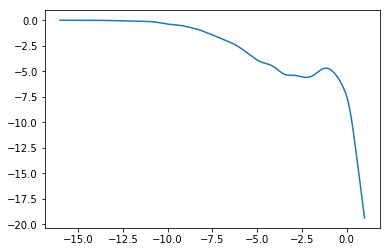

In [36]:
native = DensityEstimate.read('../../combind_data/bpp_outputs/glide.native.de')
reference = DensityEstimate.read('../../combind_data/bpp_outputs/glide.reference.de')
ratio = DensityEstimate.read('../../combind_data/bpp_outputs/glide.pnative.de')

plt.plot(native.x, native.fx*native.n_samples)
plt.plot(reference.x, reference.fx*reference.n_samples)
plt.show()
plt.plot(ratio.x, ratio.fx)
plt.show()
plt.plot(ratio.x, np.log(ratio.fx))
plt.show()

In [2]:
data = {}
with open('../../combind_data/bpp_outputs/fps.csv') as fp:
    fp.readline()
    for line in fp:
        try:
            (protein, struct, ligand, rank, gscore, emodel,
             rmsd, finger) = line.strip().split('\t')
            if protein not in data: data[protein] = {}
            if ligand not in data[protein]: data[protein][ligand] = {}
            finger = {(int(interaction), residue): float(score)
                      for interaction, residue, score in \
                      map(lambda x: x.split(','), finger.split(';'))}
            gscore, emodel, rmsd = float(gscore), float(emodel), float(rmsd)
            rank = int(rank)
            data[protein][ligand][rank] = (gscore, emodel, rmsd, finger)
        except:
            pass
for protein, ligand in data.items():
    print protein, len(ligand)

P00489 20
5HT2B 2
PLK1 12
Q16539 19
MGLUR5 5
ERA 19
M3 2
P07900 20
GLUT1 3
P18031 20
P56817 20
O60885 17
MEK1 20
JAK2 20
P00742 20
DTRANSP 9
SIGMA1 2
P00734 20
P00760 20
B2AR 8
GCR 18
P24941 13
B1AR 12
VITD 20
A2AR 18
SMO 7
P03951 14
P00749 20
Q9Y233 20
CHK1 20
TRPV1 2
CDK2 20
AR 11
BRAF 19
MR 13
STRANSP 5


In [3]:
features = {
    'hbond_donor':[2],
    'hbond_acceptor':[3],
    #'sb1':[0],
    'sb2':[1],
    #'sb3':[4],
    'pipi':[6],
    'picat':[7,8],
    'contact':[11]
}

max_poses = 50

# Averaging

(23755,)


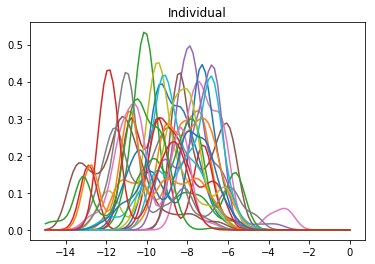

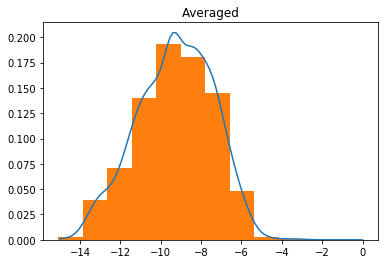

6958.0 2.5 6958


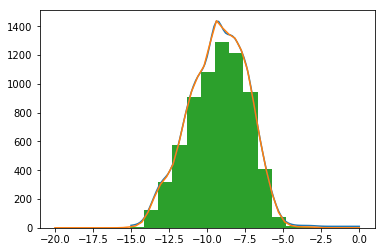

In [4]:
gscores = np.array([pose[0]
                    for protein, ligands in data.items()
                    for ligand, poses in ligands.items()
                    for rank, pose in poses.items()
                    if rank < max_poses])
natives = np.array([pose[2] <= 2
                    for protein, ligands in data.items()
                    for ligand, poses in ligands.items()
                    for rank, pose in poses.items()
                    if rank < max_poses])

print natives.shape

prob = False
sd = 0.4
native_de = DensityEstimate(points = 100, domain = (-15, 0), sd = sd, out_of_bounds=0, reflect = False)
for i in range(0, gscores.shape[0]-1, 1000):
    temp = DensityEstimate(points = 100, domain = (-15, 0), sd = sd, out_of_bounds=0,  reflect = False)
    temp.fit(gscores[i:i+1000][natives[i:i+1000]==1])
    plt.plot(temp.x, temp.fx)
    native_de = native_de.average(temp)
plt.title('Individual')
plt.show()

plt.plot(native_de.x, native_de.fx)
plt.hist(gscores[natives==1], normed = True)
plt.title('Averaged')
plt.show()

plt.plot(native_de.x, 10+native_de.fx*native_de.n_samples)

native_de = DensityEstimate(points = 50, sd = sd, domain = (-20, 0), out_of_bounds=0, reflect = False)
native_de.fit(gscores[natives==1])

plt.plot(native_de.x, native_de.fx*native_de.n_samples)
print native_de.n_samples, np.sum(native_de.fx), np.sum(natives==1)
plt.hist(gscores[natives==1], bins = int(np.ceil(gscores[natives==1].max() - gscores[natives==1].min())))
plt.show()

# Reflection

(300,) (300,)
(300,) (300,)


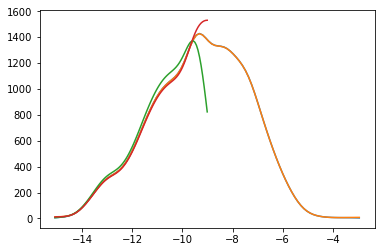

(300,) (300,)
(300,) (300,)


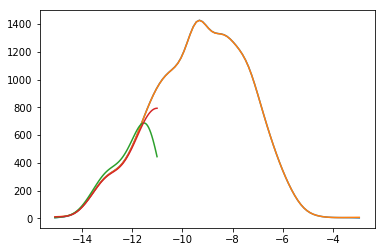

In [5]:
native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = False)
native_de.fit(gscores[natives==1])
plt.plot(native_de.x, native_de.fx*native_de.n_samples)

native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = True)
native_de.fit(gscores[natives==1])
plt.plot(native_de.x, native_de.fx*native_de.n_samples)

native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = False)
native_de.fit(gscores[(natives==1) * (gscores < -9)])
plt.plot(native_de.x, native_de.fx*native_de.n_samples)

native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = True)
native_de.fit(gscores[(natives==1) * (gscores < -9)])
plt.plot(native_de.x, native_de.fx*native_de.n_samples)

plt.show()


native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = False)
native_de.fit(gscores[natives==1])
plt.plot(native_de.x, native_de.fx*native_de.n_samples)

native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = True)
native_de.fit(gscores[natives==1])
plt.plot(native_de.x, native_de.fx*native_de.n_samples)

native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = False)
native_de.fit(gscores[(natives==1) * (gscores < -11)])
plt.plot(native_de.x, native_de.fx*native_de.n_samples)

native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = True)
native_de.fit(gscores[(natives==1) * (gscores < -11)])
plt.plot(native_de.x, native_de.fx*native_de.n_samples)

plt.show()

# Ratio

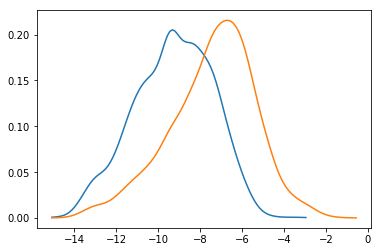

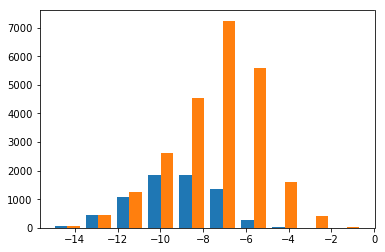

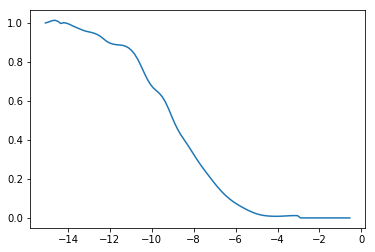

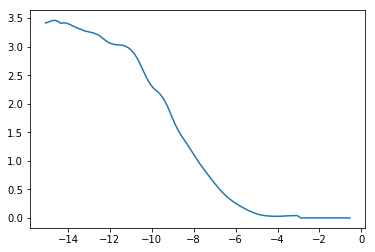

In [6]:
native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = False)
native_de.fit(gscores[natives==1])
plt.plot(native_de.x, native_de.fx)
ref_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = False)
ref_de.fit(gscores)
plt.plot(ref_de.x, ref_de.fx)
plt.show()

plt.hist([gscores[natives==1], gscores])
plt.show()

p_native = native_de.ratio(ref_de, prob = False)
plt.plot(p_native.x, p_native.fx)
plt.show()

p_native = native_de.ratio(ref_de, prob = True)
plt.plot(p_native.x, p_native.fx)
plt.show()

# I/O

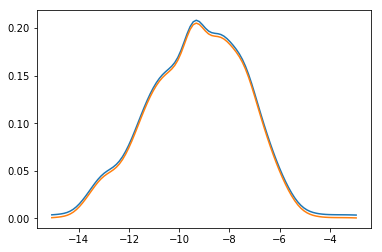

In [7]:
native_de = DensityEstimate(points = 100, sd = sd, out_of_bounds=0, reflect = False)
native_de.fit(gscores[natives==1])

native_de.write('temp')
new = DensityEstimate.read('temp')
os.system('rm temp')

plt.plot(native_de.x, native_de.fx+.003)
plt.plot(new.x, new.fx)
plt.show()